<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import pandas as pd
import numpy as np
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings 
warnings.filterwarnings('ignore')
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)
import plotly.graph_objs as go
#import plotly.plotly as py
import cufflinks
pd.options.display.max_columns = 30
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
import chart_studio.plotly as cs
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()
from collections import Counter
#import scattertext as st
import spacy
from pprint import pprint

Loading BokehJS ...

In [2]:
import pandas as pd
import unicodedata
df = pd.read_csv('Sentences_traindata.csv', encoding = 'utf8')

df['Statements'] = (df['Statements'].map(lambda x: unicodedata.normalize('NFKD', str(x))))

df.head()

,Statements,label
0,This initiated progressive collapse of the ent...,1
1,The building is 52 stories tall (plus one unde...,1
2,It was also one of the first projects accepted...,1
3,"The building was 610 feet (190 m) tall, with a...",1
4,Tishman Realty & Construction managed construc...,1


In [3]:
df.isna().sum()

Statements    0
label         0
dtype: int64

In [4]:
df.shape

(40897, 2)

In [5]:
df.head()

,Statements,label
0,This initiated progressive collapse of the ent...,1
1,The building is 52 stories tall (plus one unde...,1
2,It was also one of the first projects accepted...,1
3,"The building was 610 feet (190 m) tall, with a...",1
4,Tishman Realty & Construction managed construc...,1


In [6]:
# Top unigrams before removing stop words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['Statements'], 20)
for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['Statements' , 'count'])

the 196009
of 86013
and 80832
in 70391
to 56155
was 32149
as 22309
by 20413
for 19702
is 19132
his 18470
with 17909
on 17808
he 16512
that 15586
from 13552
it 13389
at 11993
an 10022
were 9112


In [7]:
# Top unigrams after removing stop words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['Statements'], 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['Statements' , 'count'])

new 4099
war 4018
time 3738
game 3490
world 3280
later 3012
years 2919
known 2628
series 2404
united 2322
year 2295
second 2261
early 2235
including 2234
work 2188
century 2168
team 1997
american 1966
following 1958
used 1944


In [8]:
#  Top bigrams before removing stop words
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['Statements'], 20)
for word, freq in common_words:
    print(word, freq)
df3 = pd.DataFrame(common_words, columns = ['Statements' , 'count'])

of the 27581
in the 18875
to the 9241
and the 7358
on the 5851
for the 5487
at the 5045
by the 4960
from the 4123
with the 4058
the first 3744
as the 3609
it was 3189
he was 3113
to be 2757
during the 2609
one of 2574
of his 2414
it is 2274
that the 2265


In [9]:
df3.groupby('Statements').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams in the text before removing stop words')

In [10]:
# Top bigrams after removing stop words
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['Statements'], 20)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['Statements' , 'count'])

united states 1670
world war 1266
new york 777
war ii 462
video game 365
20th century 354
united kingdom 343
19th century 325
years later 320
following year 299
took place 297
air force 292
civil war 285
science fiction 273
north america 268
second world 265
new zealand 255
football league 248
world cup 237
los angeles 215


In [11]:
df4.groupby('Statements').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams in the text after removing stop words')

In [12]:
# Top trigrams before removing stop words
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df['Statements'], 20)
for word, freq in common_words:
    print(word, freq)
df5 = pd.DataFrame(common_words, columns = ['Statements' , 'count'])

one of the 1604
the united states 1328
as well as 933
part of the 894
the end of 815
the battle of 685
known as the 641
in the united 605
end of the 601
as part of 507
at the time 490
world war ii 437
in the early 418
member of the 407
was the first 399
most of the 397
was one of 370
as one of 365
of the united 363
in the first 352


In [13]:
df5.groupby('Statements').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 trigrams in the text before removing stop words')

In [14]:
# Top trigrams after removing stop words
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df['Statements'], 20)
for word, freq in common_words:
    print(word, freq)
df6 = pd.DataFrame(common_words, columns = ['Statements' , 'count'])

world war ii 438
second world war 255
new york city 178
new south wales 153
australian air force 98
royal australian air 94
early 20th century 93
outbreak world war 93
international union conservation 91
union conservation nature 91
van der weyden 81
video game developed 81
united states navy 78
air force raaf 75
united states army 71
american civil war 71
atlantic hurricane season 70
million years ago 64
high seas fleet 62
received positive reviews 60


In [15]:
df6.groupby('Statements').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 trigrams in the text after removing stop words')

In [16]:
df6.groupby('Statements').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 trigrams in the text after removing stop words')

In [17]:
!python -m textblob.download_corpora

Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\rakes\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rakes\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rakes\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\rakes\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\rakes\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\rakes\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!

In [18]:
blob = TextBlob(str(df['Statements']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df.iplot(
    kind='bar',
    xTitle='POS',
    yTitle='count', 
    title='Top 20 Part-of-speech tagging for Sentences corpus')

In [19]:
df['Sentence_length'] = df['Statements'].astype(str).apply(len)
df['word_count'] = df['Statements'].apply(lambda x: len(str(x).split()))

In [20]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

df['word_count'].iplot(
    kind='hist',
    bins=100,
    xTitle='Sentence_length',
    linecolor='black',
    yTitle='word_count',
    title='Text Length Distribution')

In [21]:
df.head()

,Statements,label,Sentence_length,word_count
0,This initiated progressive collapse of the ent...,1,167,27
1,The building is 52 stories tall (plus one unde...,1,101,17
2,It was also one of the first projects accepted...,1,181,30
3,"The building was 610 feet (190 m) tall, with a...",1,121,25
4,Tishman Realty & Construction managed construc...,1,67,9


In [22]:
# Topic Modeling 
reindexed_data = df['Statements']
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, smooth_idf=True)
reindexed_data = reindexed_data.values
document_term_matrix = tfidf_vectorizer.fit_transform(reindexed_data)

In [23]:
n_topics = 6
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)

In [24]:
def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

In [25]:
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

In [26]:
def get_top_n_words(n, keys, document_term_matrix, tfidf_vectorizer):
    '''
    returns a list of n_topic strings, where each string contains the n most common 
    words in a predicted category, in order
    '''
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = tfidf_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words

In [27]:
top_n_words_lsa = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

Topic 1:  new time century
Topic 2:  game games video
Topic 3:  league football cup
Topic 4:  war battle japanese
Topic 5:  highway state hurricane
Topic 6:  nan painting art


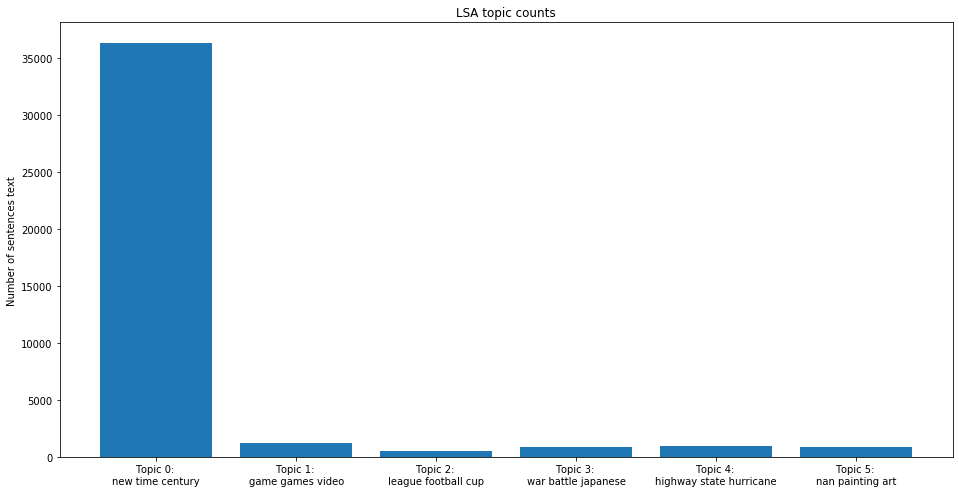

In [28]:
top_3_words = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lsa_categories]

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lsa_categories, lsa_counts);
ax.set_xticks(lsa_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('Number of sentences text');
ax.set_title('LSA topic counts');
plt.show();

In [ ]:
tsne_lsa_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lsa_vectors = tsne_lsa_model.fit_transform(lsa_topic_matrix)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 40897 samples in 0.063s...
[t-SNE] Computed neighbors for 40897 samples in 4.303s...
[t-SNE] Computed conditional probabilities for sample 1000 / 40897
[t-SNE] Computed conditional probabilities for sample 2000 / 40897
[t-SNE] Computed conditional probabilities for sample 3000 / 40897
[t-SNE] Computed conditional probabilities for sample 4000 / 40897
[t-SNE] Computed conditional probabilities for sample 5000 / 40897
[t-SNE] Computed conditional probabilities for sample 6000 / 40897
[t-SNE] Computed conditional probabilities for sample 7000 / 40897
[t-SNE] Computed conditional probabilities for sample 8000 / 40897
[t-SNE] Computed conditional probabilities for sample 9000 / 40897
[t-SNE] Computed conditional probabilities for sample 10000 / 40897
[t-SNE] Computed conditional probabilities for sample 11000 / 40897
[t-SNE] Computed conditional probabilities for sample 12000 / 40897
[t-SNE] Computed conditional probabilities for sa

In [ ]:
def get_mean_topic_vectors(keys, two_dim_vectors):
    '''
    returns a list of centroid vectors from each predicted topic category
    '''
    mean_topic_vectors = []
    for t in range(n_topics):
        sentence_in_that_topic = []
        for i in range(len(keys)):
            if keys[i] == t:
                sentence_in_that_topic.append(two_dim_vectors[i])    
        
        sentence_in_that_topic = np.vstack(sentence_in_that_topic)
        mean_sentence_in_that_topic = np.mean(sentence_in_that_topic, axis=0)
        mean_topic_vectors.append(mean_sentence_in_that_topic)
    return mean_topic_vectors

In [ ]:
colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5" ])
colormap = colormap[:n_topics]

In [ ]:
top_3_words_lsa = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)
lsa_mean_topic_vectors = get_mean_topic_vectors(lsa_keys, tsne_lsa_vectors)

plot = figure(title="t-SNE Clustering of {} LSA Topics".format(n_topics), plot_width=700, plot_height=700)
plot.scatter(x=tsne_lsa_vectors[:,0], y=tsne_lsa_vectors[:,1], color=colormap[lsa_keys])

for t in range(n_topics):
    label = Label(x=lsa_mean_topic_vectors[t][0], y=lsa_mean_topic_vectors[t][1], 
                  text=top_3_words_lsa[t], text_color=colormap[t])
    plot.add_layout(label)
    
show(plot)